In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Carregando dados:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(500, 2)

In [4]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [5]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Análise Exploratória

In [7]:
#Checar se há valores ausentes, caso tenha deve-se tratar.
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [8]:
#Correlacao: coenficiente que vai de -1 a +1.
#se proximo a -1 forte correlaçao negativa , se proximo +1 forte correlaçao positiva 
#e proximo a 0 indica falta de correlacao
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [9]:
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [10]:
#resumo estatístico da variavel preditora
df["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

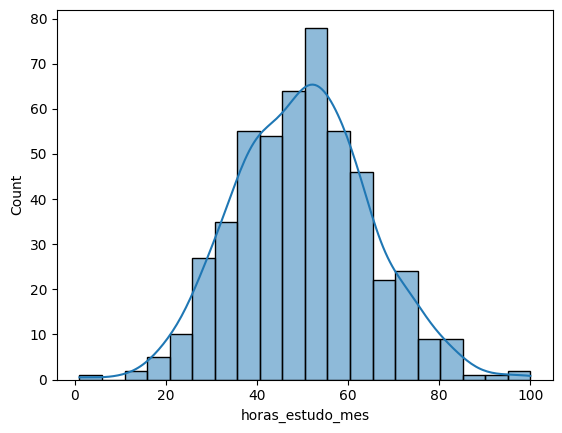

In [11]:
#Histograma da variável preditora
sns.histplot(data = df, x = "horas_estudo_mes", kde = True)

# Preparacao De Dados

In [12]:
#prepara a variavel
X = np.array(df["horas_estudo_mes"])

In [13]:
type(X)

numpy.ndarray

In [14]:
#Ajusta o shape de X
X = X.reshape(-1, 1)

In [15]:
#Prepara a variavel alvo
Y = df["salario"]

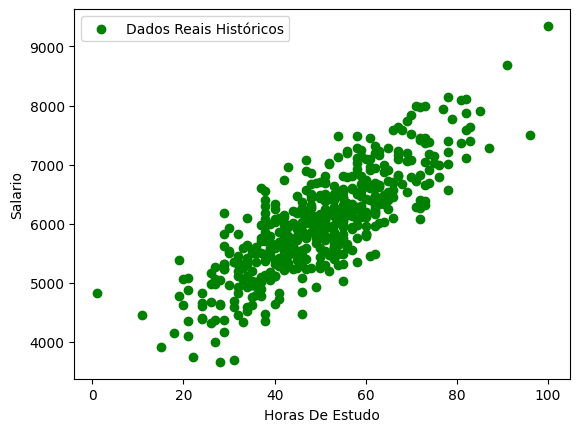

In [16]:
#Gráfico de Dispersão para vizualizar a correlacao, feita anteriormente
plt.scatter(X, Y, color = "green", label = "Dados Reais Históricos")
plt.xlabel("Horas De Estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [17]:
#Divisao de dados em treinamento e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [18]:
X_treino.shape

(400, 1)

In [19]:
Y_treino.shape

(400,)

In [20]:
X_teste.shape

(100, 1)

In [21]:
Y_teste.shape

(100,)

# Modelagem Preditiva (Machine Learning)

In [23]:
#Criando o modelo de Regressão Linear Simples:
modelo = LinearRegression()

In [25]:
modelo.fit(X_treino, Y_treino)

LinearRegression()

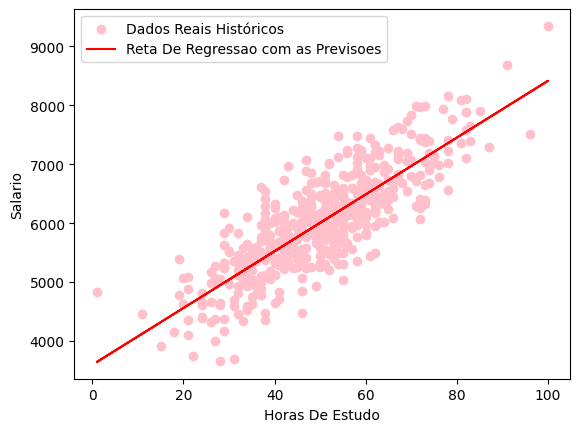

In [27]:
plt.scatter(X, Y, color = "pink", label = "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta De Regressao com as Previsoes")
plt.xlabel("Horas De Estudo")
plt.ylabel("Salario")
plt.legend()
plt.show()

In [29]:
#Avalia modelo
score = modelo.score(X_teste, Y_teste)
print(f"Coenficiente Rˆ2: {score:.2f}")

Coenficiente Rˆ2: 0.59


In [33]:
#Intercepto - parametro w0
modelo.intercept_

3596.7837243727545

In [35]:
#Slope - parametro w1
modelo.coef_

array([48.18185277])